<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Tipología y ciclo de vida de los datos · PRA2</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Práctica 2

Siguiendo las principales etapas de un proyecto analítico, las diferentes tareas a realizar (y
justificar) en esta práctica son las siguientes:

1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende
responder?
2. Integración y selección de los datos de interés a analizar.
3. Limpieza de los datos.
3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno
de estos casos?
3.2. Identificación y tratamiento de valores extremos.
4. Análisis de los datos.

    4.1. Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).
    
    4.2. Comprobación de la normalidad y homogeneidad de la varianza.
    
    4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.


5. Representación de los resultados a partir de tablas y gráficas.
6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?

In [59]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.utils import check_random_state
from sklearn import tree
from tqdm import tqdm

# Visualizar árboles
from IPython.display import Image
import pydotplus
from six import StringIO

# Visualización
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# 1. Descripción del dataset

Para este ejercicio se proporciona un _dataset_ con datos sobre diferentes clientes de un banco que quieren comprar un piso, y si el banco les ha concedido la hipoteca o no. 

La información es la siguiente:

  - `ingresos`: los ingresos mensuales de la familia.
  - `gastos_comunes`: pagos mensuales de luz, agua, gas, etc.
  - `pago_coche`: si se está pagando cuota por uno o más coches, y los gastos mensuales en combustible, etc.
  - `gastos_otros`: compra mensual en supermercado y lo necesario para vivir.
  - `ahorros`: suma de ahorros dispuestos a utilizar para la compra de la casa.
  - `vivienda`: precio de la vivienda que quiere comprar esta familia.
  - `estado_civil`: 0-soltero, 1-casados, 2-divorciados
  - `hijos`: cantidad de hijos menores y que no trabajan.
  - `trabajo`: 0-sin empleo, 1-autónomo (freelance), 2-empleado, 3-empresario, 4-pareja: autónomos, 5-pareja: empleados, 6-pareja: autónomo y asalariado, 7-pareja: empresario y autónomo , 8-pareja: empresarios los dos o empresario y empleado
  - `hipoteca`: 0-No ha sido concedida, 1-Si que ha sido concedida (esta será nuestra columna de salida, para aprender)
  
Empezamos leyendo el _dataset_ y viendo una muestra de las primeras filas.

In [2]:
hipotecas = pd.read_csv("hipotecas.csv")
hipotecas.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


### 2. Integración y selección de los datos de interés a analizar.



#### Análisis descriptivo

Cuando se nos proporciona un _dataset_, antes de empezar a hacer nada, es muy importante hacer un análisis exploratorio para conocer los datos con los que trabajaremos.

In [3]:
# Cálculo de frecuencias absolutas de la variable hipoteca
pd.value_counts(hipotecas['hipoteca'])

0    135
1     67
Name: hipoteca, dtype: int64

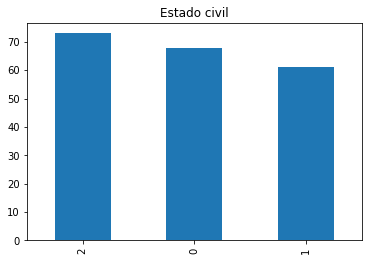

In [4]:
# Gráfico de barras de las variable estado_civil
plot = hipotecas['estado_civil'].value_counts().plot(kind='bar', title='Estado civil')

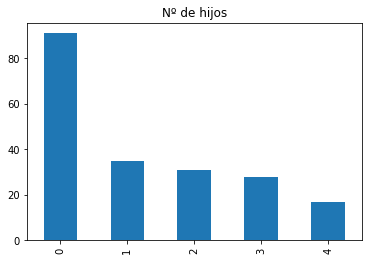

In [5]:
# Gráfico de barras de las variable hijos
plot = hipotecas['hijos'].value_counts().plot(kind='bar', title='Nº de hijos')

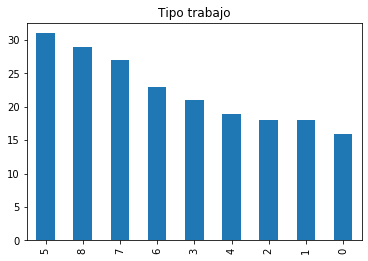

In [6]:
# Gráfico de barras de las variable trabajo
plot = hipotecas['trabajo'].value_counts().plot(kind='bar', title='Tipo trabajo')

Text(0.5, 1.0, 'ingresos')

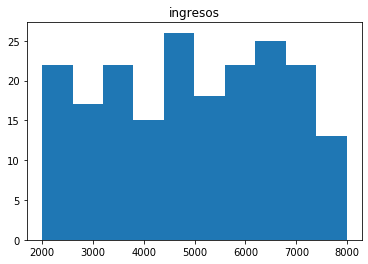

In [7]:
# Histograma de la variable ingresos
plt.hist(hipotecas['ingresos'])
plt.title('ingresos')

Text(0.5, 1.0, 'gastos comunes')

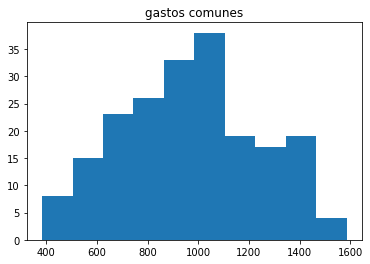

In [8]:
# Histograma de la variable gastos_comunes
plt.hist(hipotecas['gastos_comunes'])
plt.title('gastos comunes')

Text(0.5, 1.0, 'cuota del coche')

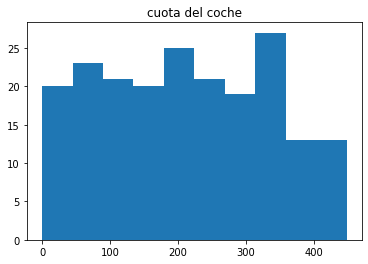

In [9]:
# Histograma de la variable pago_coche
plt.hist(hipotecas['pago_coche'])
plt.title('cuota del coche')

Text(0.5, 1.0, 'Otros gastos necesarios')

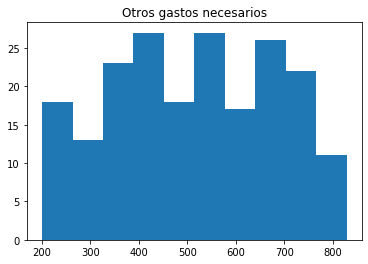

In [10]:
# Histograma de la variable gastos_otros
plt.hist(hipotecas['gastos_otros'])
plt.title('Otros gastos necesarios')

Text(0.5, 1.0, 'Ahorros aportados')

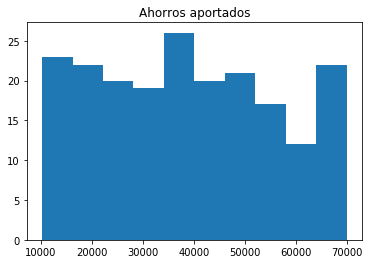

In [11]:
# Histograma de la variable ahorros
plt.hist(hipotecas['ahorros'])
plt.title('Ahorros aportados')

Text(0.5, 1.0, 'Importe de la vivienda')

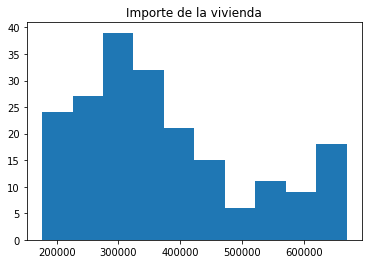

In [12]:
# Histograma de la variable vivienda
plt.hist(hipotecas['vivienda'])
plt.title('Importe de la vivienda')

Concluimos que todos los registros y campos nos pueden ser de utilidad.

### 3. Limpieza de los datos

Una vez hecho un primer análisis, se trata de "limpiar" el dataset y adaptarlo a nuestras necesidades (en este caso, predecir si se concederá la hipoteca o no).

#### 3.1. ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos??


In [13]:
# Si la siguiente sentencia devuelve False, no hay valores nulos
hipotecas.isnull().values.any()

False

In [14]:
# Primer análisis estadístico de los datos
hipotecas.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


Si hubiese habido elementos vacíos en los campos categóricos, si hubiesen sido pocos lo más sensato hubiese sido eliminar esos registros por falta de datos.

En cuánto a "0" en los campos numéricos, encontramos que hay en los campos "pago coche" e "hijos". En este caso, tiene sentido que haya ceros, pues se puede deber a que el cliente no tiene coche o no tiene hijos en cada uno de los casos. Con lo cuál, estos valores quedarán como "0". Si por el contrario hubiese habido algún "0" en el valor de la vivienda, esto se trataría claramente de un erros y se podría, o bien anular el registro, o bien hacer un cálculo de la media de este campo y asignarlo.

#### 3.2. Identificación y tratamiento de valores extremos


Podemos utilizar gráficos de bigotes en las variables numéricas para identificar valores extremos.


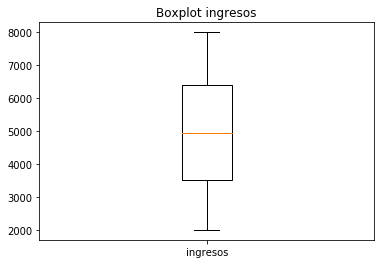

In [15]:
# Con un diamante verde se marcarán los outliers
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot ingresos')
ax.boxplot(hipotecas['ingresos'], flierprops=green_diamond, labels=["ingresos"]);

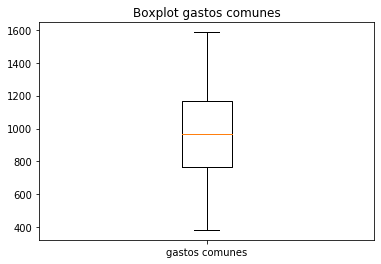

In [16]:
# gastos_comunes
fig, ax = plt.subplots()
ax.set_title('Boxplot gastos comunes')
ax.boxplot(hipotecas['gastos_comunes'], flierprops=green_diamond, labels=["gastos comunes"]);

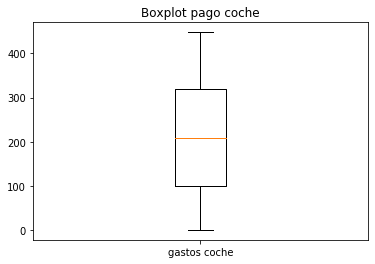

In [17]:
# gastos_comunes
fig, ax = plt.subplots()
ax.set_title('Boxplot pago coche')
ax.boxplot(hipotecas['pago_coche'], flierprops=green_diamond, labels=["gastos coche"]);

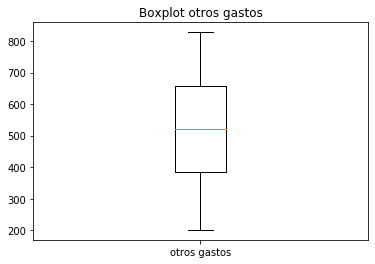

In [18]:
# gastos_otros
fig, ax = plt.subplots()
ax.set_title('Boxplot otros gastos')
ax.boxplot(hipotecas['gastos_otros'], flierprops=green_diamond, labels=["otros gastos"]);

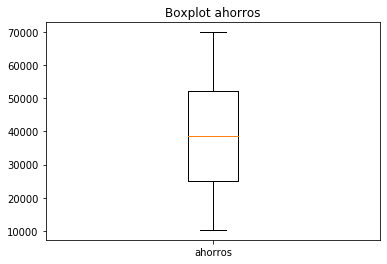

In [19]:
# ahorros
fig, ax = plt.subplots()
ax.set_title('Boxplot ahorros')
ax.boxplot(hipotecas['ahorros'], flierprops=green_diamond, labels=["ahorros"]);

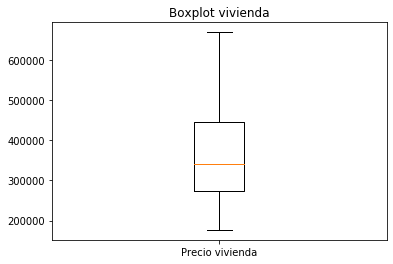

In [20]:
# vivienda
fig, ax = plt.subplots()
ax.set_title('Boxplot vivienda')
ax.boxplot(hipotecas['vivienda'], flierprops=green_diamond, labels=["Precio vivienda"]);

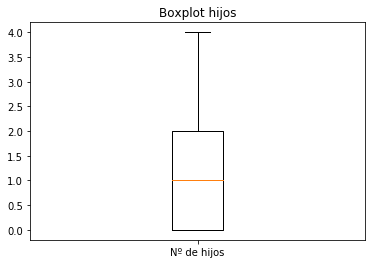

In [21]:
# hijos
fig, ax = plt.subplots()
ax.set_title('Boxplot hijos')
ax.boxplot(hipotecas['hijos'], flierprops=green_diamond, labels=["Nº de hijos"]);

Observamos que no hay ningún Outlier.

Por terminar con este punto de limpieza de datos, vamos a realizar una adaptación de nuestro dataset para agrupar todos los datos de gastos en una única columna.

In [22]:
# Agregamos la nueva columna gastos como suma de las otras 3 columnas
hipotecas.insert(1,"gastos", hipotecas['pago_coche']+hipotecas['gastos_comunes']+hipotecas['gastos_otros'])

# Eliminamos las 3 columnas, pues la información de estas, ya está agrupada en una sola
hipotecas = hipotecas.drop(['pago_coche', 'gastos_comunes', 'gastos_otros'], axis=1)

# Mostramos el resultado
hipotecas.head(10)

,ingresos,gastos,ahorros,vivienda,estado_civil,hijos,trabajo,hipoteca
0,6000,1600,50000,400000,0,2,2,1
1,6745,1496,43240,636897,1,3,6,0
2,6455,1926,57463,321779,2,1,8,1
3,7098,1547,54506,660933,0,0,3,0
4,6167,1606,41512,348932,0,0,3,1
5,5692,1247,50875,360863,1,4,5,1
6,6830,1952,46761,429812,1,1,5,1
7,6470,1856,57439,606291,0,0,1,0
8,6251,2030,50503,291010,0,0,3,1
9,6987,1755,40611,324098,2,1,7,1


Finalmente, sólo nos queda pasar las variables categóricas a numéricas. Observad que a pesar de que todas las variables tengan números, esto no quiere decir que sean numéricas. Por ejemplo, la variable `estado_civil` tiene los valores 0-1-2, que sería lo mismo que si tuviera los valores soltero-casado-divorciado. Hay otras variables donde esto no ocurre, por ejemplo el número de hijos, que a pesar de ser categórica sí que son números, ya que es ordinal. La manera de diferenciarlo es, en el caso del número de hijos, 1 hijo es menos que 2 hijos, mientras que con el estado civil no hay un orden.

Una manera de pasar las variables categóricas en numéricas es aplicando _one-hot encoding_. Por ejemplo, en el caso de la variable `estado_civil`, lo que se haría sería crear tres columnas nuevas: `soltero`, `casado` y `divorciado`. Estas columnas tendrían los valores 0-1, por ejemplo, en el caso de la columna `soltero` tendría el valor 1 cuando `estado_civil = soltero`, y cero en otro caso.

In [23]:
# Creo dataFrame auxiliar para disgregar las columnas categóricas mediante el método get_dummies
df_2 = pd.get_dummies(hipotecas, columns=['estado_civil', 'trabajo'], drop_first=False)

# Integro las nuevas columnas y reordeno
hipotecas= pd.DataFrame(df_2.values, columns = ['ingresos', 'gastos', 'ahorros', 'vivienda', 'hijos', 'hipoteca', 'soltero', 'casado', 'divorciado', 't0', 't1','t2', 't3', 't4','t5','t6','t7','t8'])
hipotecas = hipotecas[['ingresos', 'gastos', 'ahorros', 'vivienda','soltero', 'casado', 'divorciado', 'hijos','t0', 't1','t2', 't3', 't4','t5','t6','t7','t8', 'hipoteca']]

# Muestro el resultado
hipotecas.head()

,ingresos,gastos,ahorros,vivienda,soltero,casado,divorciado,hijos,t0,t1,t2,t3,t4,t5,t6,t7,t8,hipoteca
0,6000,1600,50000,400000,1,0,0,2,0,0,1,0,0,0,0,0,0,1
1,6745,1496,43240,636897,0,1,0,3,0,0,0,0,0,0,1,0,0,0
2,6455,1926,57463,321779,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,7098,1547,54506,660933,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,6167,1606,41512,348932,1,0,0,0,0,0,0,1,0,0,0,0,0,1


El siguiente paso sería ver la correlación entre todas las _features_ numéricas. Esto se hace para asegurar que no hay dos variables muy relacionadas entre sí, ya que en tal caso se debería seleccionar una de las dos o combinarlas en una nueva.

### 4. Análisis de los datos

#### 4.1.  Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).

Por un lado, consideramos una buena estrategia comprobar las correlaciones entre las variables numéricas.

Por otro lado, es interesante comparar cada una de las variables con el campo "hipoteca", el cuál indica en base al resto de datos del registro si al clente se le puede conceder la hipoteca o no.

También se pueden realizar varios test comparando a los clientes que se les concede la hipoteca con los que no se les concede.

#### 4.2.  Comprobación de la normalidad y homogeneidad de la varianza.

El supuesto de homogeneidad de varianzas, también conocido como supuesto de homocedasticidad, considera que la varianza es constante (no varía) en los diferentes niveles de un factor, es decir, entre diferentes grupos. En los modelos de regresión lineal, esta condición de homocedasticidad suele hacer referencia a los errores (residuos) del modelo, es decir, que la varianza de los errores es constante en todas las predicciones. Cuando la condición de homocedasticidad no se cumple, se utiliza el término heterocedasticidad.

Existen diferentes test que permiten evaluar si las observaciones proceden de poblaciones con la misma varianza. Todos ellos consideran como hipótesis nula que la varianza es igual entre los grupos y como hipótesis alternativa que no lo es. La diferencia entre ellos es el estadístico de centralidad que utilizan:

    *Los test que utilizan la media de la varianza son los que mayor poder estadístico consiguen cuando los datos siguen distribuciones normales.

    *Los test que utilizan la mediana de la varianza consiguen mejores resultados cuando los datos siguen distribuciones asimétricas o se alejan de la normalidad.

Por lo general, si no se puede alcanzar cierta seguridad de que las poblaciones que se comparan son de tipo normal, es recomendable recurrir a test que comparen la mediana de la varianza.

En nuestro caso, los dos grupos que srán sometidos a análisis serán el conjunto de clientes a los que se les concede hipotecas y el conjunto de clientes a los que no se les concede hipoteca. Concretamente, se estudiará para la variable "ingresos", la cuál, cómo se puede observar en el histograma extraído anteriormente para esta variable, no sigue una distribucion normal. Con lo cuál se usará un test que utilize la mediana de la varianza, concretamente, el test de Levene. 

Fuente: https://www.cienciadedatos.net/documentos/pystats07-test-homocedasticidad-heterocedasticidad-python.html

In [24]:
# Extraemos los datos que nos interesan separados por grupos (Ingresos de SiHipoteca y NoHipoteca).
hipotecas['hipoteca'] = hipotecas['hipoteca'].astype(str)
SiHipoteca = hipotecas.loc[hipotecas.hipoteca == '1', 'ingresos']
NoHipoteca = hipotecas.loc[hipotecas.hipoteca == '0', 'ingresos']

levene_test = stats.levene(SiHipoteca, NoHipoteca, center='median')
levene_test

LeveneResult(statistic=14.436323831510473, pvalue=0.00019233822549093488)

Observamos que no se cumple homocedasticidad, en cuánto a la variable "ingresos" se refiere, para los grupos de hipotecados y no hipotecados, pues el p-value es muy bajo (nos marcamos un nivel confianza en el test del 5%).

#### 4.3.  Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

##### Test 1

Mostraremos la correlación entre todas las _features_ numéricas.

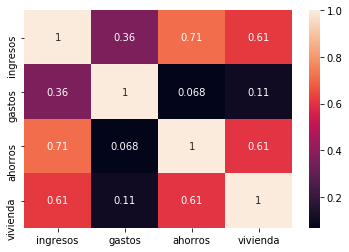

In [25]:
# Creamos la matriz de correlación
f_numericas = hipotecas.iloc[:,:4]
correlation_mat = f_numericas.corr()

# Mostramos con heatmap las correlaciones
sns.heatmap(correlation_mat, annot = True)
plt.show()

Cómo previamente habíamos eliminado las 3 columnas de gastos que ya agrupamos en una, no obtenemos ninguna correlación por encima del 71%. Este valor se da para las variables ingresos y ahorros. Tiene lógica que a mayor nivel de ingresoso, mayor es la capacidad de ahorrar del cliente y por lo tanto, más ahorros tiene.

##### Test 2

Contraste de hipótesis de la variable ahorros. ¿Es la media de los ahorros de los no hioptecados igual a la media de ahorros de los hipotecados?

H0: Medias de ahorros iguales

In [26]:
hipotecas['hipoteca'] = hipotecas['hipoteca'].astype(int)

In [27]:
hipotecas['hipoteca'] = np.where(hipotecas['hipoteca'] == 1, 'Si hipoteca', 'No hipoteca')
hipotecas.groupby(by='hipoteca').describe()

ingresos                                                    \
               count         mean          std     min     25%     50%   
hipoteca                                                                 
No hipoteca    135.0  4406.570370  1646.043268  2008.0  3082.0  4054.0   
Si hipoteca     67.0  6072.089552  1114.368251  3382.0  5441.5  6139.0   

                            gastos               ...   t7          t8  \
                75%     max  count         mean  ...  75%  max  count   
hipoteca                                         ...                    
No hipoteca  5760.5  7831.0  135.0  1690.755556  ...  0.0  1.0  135.0   
Si hipoteca  6946.5  7984.0   67.0  1714.865672  ...  0.0  1.0   67.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
hipoteca                                                  
No hipoteca  0.111111  0.315440  0.0  0.0  0.0  0.0  1.0  
Si hipoteca  0.208955  0.409631  0.0  0.0  0.0  0.0  1.0  

[2 rows x 136 columns]

In [28]:
dif_observada = (hipotecas.ahorros[hipotecas.hipoteca == 'Si hipoteca'].mean()
                 - hipotecas.ahorros[hipotecas.hipoteca == 'No hipoteca'].mean())

print(f"Diferencia de medias de ahorros observada: {dif_observada}")

Diferencia de medias de ahorros observada: 12537.806633499174


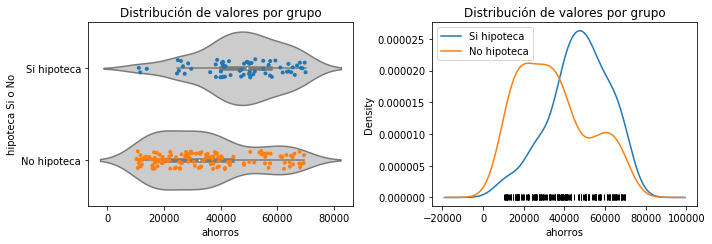

In [31]:
# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
sns.violinplot(
    x     = hipotecas.ahorros,
    y     = hipotecas.hipoteca,
    color = ".8",
    ax    = axs[0]
)
sns.stripplot(
    x     = hipotecas.ahorros,
    y     = hipotecas.hipoteca,
    data  = hipotecas,
    size  = 4,
    jitter  = 0.1,
    palette = 'tab10',
    ax = axs[0]
)
axs[0].set_title('Distribución de valores por grupo')
axs[0].set_ylabel('hipoteca Si o No')
axs[0].set_xlabel('ahorros');

for hipoteca in hipotecas.hipoteca.unique():
    datos_temp = hipotecas[hipotecas.hipoteca == hipoteca]['ahorros']
    datos_temp.plot.kde(ax=axs[1], label=hipoteca)
    axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

axs[1].set_title('Distribución de valores por grupo')
axs[1].set_xlabel('ahorros');
axs[1].legend()

fig.tight_layout();

Se observa claramente que el nivel de ahorros influye en la concesión de la hipoteca. A mayor nivel de ahorros, mayor probabilidad de que te concedan la hipoteca tienes.

El objetivo del estudio es determinar si, la diferencia observada de 12.537,80€ unidades, está dentro de lo que cabría esperar debido únicamente al muestreo aleatorio, si no existiera diferencia real entre las poblaciones ( H0 : todas las observaciones proceden de la misma población).

Si se obtuviera una nueva muestra de clientes, la diferencia promedio entre grupos sería ligeramente distinta, aunque no existiera una diferencia real entre hipotecados y no hipotecados. Por lo tanto, dar respuesta a este problema pasa por determinar cuánta diferencia se espera por el simple hecho de repetir el muestreo.

Mediante bootstrapping, se generan nuevas pseudo-muestras de individuos empleando las dos muestras originales (hipotecados y no hipotecadis) combinadas. Con cada una de las pseudo-muestras, se generan dos grupos de tamaños iguales a los grupos de las muestras originales y se calcula la diferencia del estadístico, en este caso la media. Para ello, en cada iteración y antes del reparto en grupos, se genera una nueva pseudo-muestra que tiene el mismo tamaño que la muestra original pero formada por distintas observaciones.

In [60]:
def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping_2_grupos(x1, x2, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular la diferencia de un estadístico entre dos grupos en
    múltiples muestras generadas mediante muestreo repetido con reposición
    (bootstrapping).
    
    Parameters
    ----------
    x1 : numpy array
         valores de la muestra del grupo 1.
         
    x2 : numpy array
         valores de la muestra del grupo 2.
 
    fun_estadistico : function
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        diferencia entre ambos grupos en cada muestra de bootstrapping.
    '''
    
    n1 = len(x1)
    n2 = len(x2)
    pool = np.hstack((x1, x2))
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        # Se crea una nueva muestra
        resample = np.random.choice(pool, size=n1+n2, replace=True)
        # Se reparten las observaciones en dos grupos y se calcula el estadístico
        estadistico_1 = fun_estadistico(resample[:n1])
        estadistico_2 = fun_estadistico(resample[n1:])
        # Diferencia entre estadísticos
        dist_boot[i]  = estadistico_1 - estadistico_2
        
    return dist_boot

In [61]:
dist_boot = bootstraping_2_grupos(
                x1 = hipotecas.ahorros[hipotecas.hipoteca == 'Si hipoteca'],
                x2 = hipotecas.ahorros[hipotecas.hipoteca == 'No hipoteca'],
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:00<00:00, 32550.98it/s]


Los datos simulados forman lo que se conoce como bootstrapping distribution y representa la variación esperada en la diferencia de medias debida únicamente al muestreo aleatorio, si ambas muestras proceden de la misma población.

In [63]:
p_value = (sum(np.abs(dist_boot) > np.abs(dif_observada)))/len(dist_boot)
p_value_correc = (sum(np.abs(dist_boot) > np.abs(dif_observada)) + 1)/len(dist_boot + 1)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.0
p-value con corrección: 0.00010001000100010001


El resultado obtenido (p-value) es una evidencia en contra de la hipótesis nula de que no hay diferencia entre poblaciones.

##### Test 3 (aplicativo a resolución de problema):

Entrenamiento de modelo con Random Forest Classifier para futuras predicciones.

Ahora que ya tenemos el dataset limpio y hemos hecho un análisis de las diferentes variables, podemos proceder a entrenar un modelo para predecir si se concede una hipoteca o no.

Para empezar, separamos el dataset entre train y test.

In [69]:
X_train, X_test = train_test_split(hipotecas.iloc[:,0:17], test_size = 0.20, random_state = 24)
y_train, y_test = train_test_split(hipotecas['hipoteca'], test_size = 0.20, random_state = 24)

Vamos a optimizar el modelo mediante la optimización de los hiperparámetros para obtener los mejores resultados posibles.

In [70]:
# Creamos el vector de hiperparámetros
param_grid = {'max_depth': [6, 7, 8, 9, 10, 11, 12, 13], 'n_estimators': [ 50, 100, 150, 200, 300]}

# Utilizamos el método GridSearchCV para buscar los mejores hiperparámetros
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)
grid.fit(X_train, y_train)
print(grid)

C:\Users\C.CUEVAS.G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [71]:
# Mostramos vector de promedios y desviaciones estandar para las distintas combinaciones de hiperparámetros
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_max_depth,param_n_estimators,mean_test_score,std_test_score
28,11,200,0.894410,0.061315
13,8,200,0.888199,0.053514
14,8,300,0.888199,0.069269
37,13,150,0.888199,0.053514
29,11,300,0.888199,0.053514
17,9,150,0.888199,0.053514
35,13,50,0.888199,0.039380
10,8,50,0.888199,0.029315
15,9,50,0.888199,0.039380
32,12,150,0.888199,0.069269


In [72]:
# Entreno al grupo train con el agoritmo RandomForestClassifier
RFC = RandomForestClassifier(max_depth=11, n_estimators=200)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
# Calculo las predicciones del modelo
y_pred = RFC.predict(X_test)

# Calculo la precisión del modelo y la muestro
acc = accuracy_score(y_test, y_pred)
print('Acc: {:.4f}'.format(acc))

Acc: 0.9024


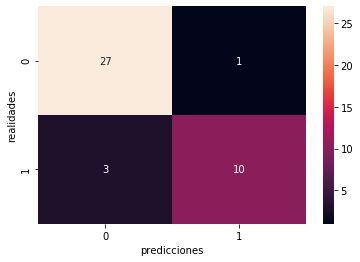

In [74]:
# Creo la matriz de confusión y la muestro
matriz = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz, annot = True)
plt.xlabel('predicciones')
plt.ylabel('realidades')
plt.show()

Observamos que nuestro modelo tiene una capacidad de predicción bastante aceptable, con un accuaricy del 90,24%.

### 5. Representación de los resultados a partir de tablas y gráficas.

Este ejercicio de representación de resultados a partir de tablas y gráficas, ya se ha hecho en los apartados anteriores de manera simultánea a la resolución de cada ejercicio. No obstante, vamos a graficar el comportamiento de ser hipotecado o no en función de algunas variables, para completar una visión más global.

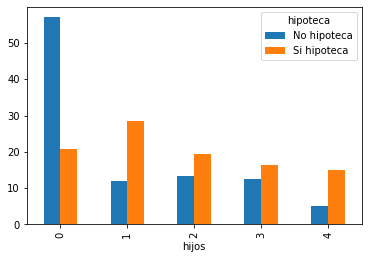

In [75]:
# Gráfico de barras de las variable hijos
plot = pd.crosstab(index=hipotecas['hijos'], columns=hipotecas['hipoteca']).apply(lambda r: r/r.sum() *100, axis=0).plot(kind='bar')

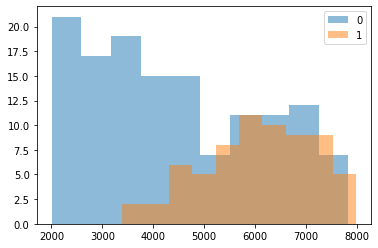

In [76]:
# Localizamos registros de hipotecados y no hipotecados
NOhip = hipotecas.loc[:, 'hipoteca'] == 'No hipoteca'
SIhip = hipotecas.loc[:, 'hipoteca'] == 'Si hipoteca'

# Mostramos histograma de ingresos
plt.hist(hipotecas['ingresos'].loc[NOhip], alpha=0.5)
plt.hist(hipotecas['ingresos'].loc[SIhip], alpha=0.5)
plt.legend('01')

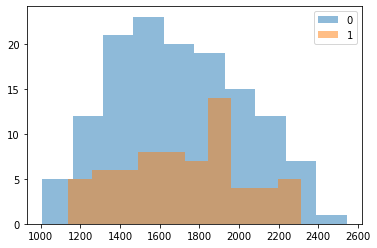

In [77]:
# Mostramos histograma de gastos
plt.hist(hipotecas['gastos'].loc[NOhip], alpha=0.5)
plt.hist(hipotecas['gastos'].loc[SIhip], alpha=0.5)
plt.legend('01')

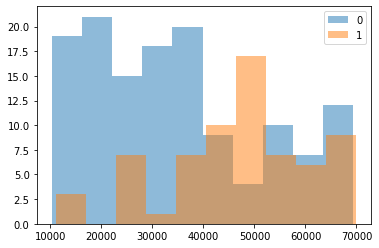

In [78]:
# Mostramos histograma de ahorros
plt.hist(hipotecas['ahorros'].loc[NOhip], alpha=0.5)
plt.hist(hipotecas['ahorros'].loc[SIhip], alpha=0.5)
plt.legend('01')

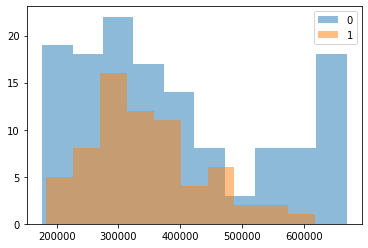

In [79]:
# Mostramos histograma de vivienda
plt.hist(hipotecas['vivienda'].loc[NOhip], alpha=0.5)
plt.hist(hipotecas['vivienda'].loc[SIhip], alpha=0.5)
plt.legend('01')

También podemos visualizar los features más decisivos del Random Forest del apartado anterior.

In [80]:
# Visualicemos los features más decisivos
importance = RFC.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (list(X_train.columns)[i],v))

Feature: ingresos, Score: 0.26077
Feature: gastos, Score: 0.08163
Feature: ahorros, Score: 0.17912
Feature: vivienda, Score: 0.22027
Feature: soltero, Score: 0.03169
Feature: casado, Score: 0.01476
Feature: divorciado, Score: 0.01587
Feature: hijos, Score: 0.09588
Feature: t0, Score: 0.02327
Feature: t1, Score: 0.00603
Feature: t2, Score: 0.00762
Feature: t3, Score: 0.00741
Feature: t4, Score: 0.00996
Feature: t5, Score: 0.01098
Feature: t6, Score: 0.00966
Feature: t7, Score: 0.01415
Feature: t8, Score: 0.01091


Las variables que han tenido más peso, al usar este algoritmo RandomForestClassifier, han sido "ingresos", "vivienda" y "ahorros" por ese orden y con bastante diferencia respecto al resto de variables.

### 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?

Para contestar a este apartado, vamos a suponer un caso práctico en el que se podría utilizar nuestra base de datos. En este caso, la base de datos serviría para el entrenamiento de un modelo que permita, mediante nuevos inputs (nuevos clientes), poder darle una respuesta rápida de si tiene posibilidades que se le conceda la hipoteca o en caso contrario, si su caso debe ser estudiado más minuciosamente para poder concederle la hipoteca.

Caso práctico:
Suponed que trabajáis en un banco y os visitan clientes que quieren una hipoteca. Aunque se ha de realizar un estudio a fondo de cada caso, así _a priori_ utilizad el clasificador entrenado para tener una idea de si se les concederá la hipoteca o no.
    
   - Caso 1: Familia con unos ingresos de 2.000 € y unos gastos de 500 €, la pareja son empresarios y no tienen hijos. Necesitarían para tener la casa de sus sueños una financiación de 200.000 €.
   - Caso 2: Familia con unos ingresos de 6.000 € y unos gastos de 3.400 €, la pareja uno es asalariado y el otro autónomo con dos hijos a su cargo. Necesitarían para tener la casa de sus sueños una financiación de 320.000 €.
   - Caso 3: Una mujer soltera con unos ingresos de 9.000 € y unos gastos de 2.250 €, con un hijo a su cargo y de profesión autónoma. Necesitaría una financiación de 39.000 €.

In [81]:
# Creación de dataframe con los casos
caso1 = pd.DataFrame(np.array([[2000, 500, 0, 200000, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), columns=X_train.columns, index =['caso1'])
caso2 = pd.DataFrame(np.array([[6000, 3400, 0, 320000, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0]]), columns=X_train.columns, index =['caso2'])
caso3 = pd.DataFrame(np.array([[9000, 2250, 0, 39000, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]), columns=X_train.columns, index =['caso3'])
casos = pd.concat([caso1, caso2, caso3])

# Predicción de los casos
pd.DataFrame([RFC.predict(casos)], columns = ['caso1', 'caso2', 'caso3'], index =['Predicciones:']).head()

,caso1,caso2,caso3
Predicciones:,No hipoteca,No hipoteca,Si hipoteca
